# Resolución de Problemas mediante Búsqueda en IA

Bienvenido a este repositorio dedicado a la **Resolución de Problemas mediante Búsqueda**, un concepto fundamental en la Inteligencia Artificial (IA). En el campo de la IA, muchos problemas se pueden formular como problemas de búsqueda, donde el objetivo es encontrar una solución dentro de un conjunto de posibles estados. Los algoritmos de búsqueda están diseñados para navegar por este conjunto, explorando diferentes estados para identificar la solución más óptima o factible.

## ¿Por qué la Búsqueda en IA?

Muchos problemas del mundo real, como la búsqueda de rutas, la toma de decisiones y los juegos, se pueden representar como problemas de búsqueda. En estos casos, el objetivo es encontrar una secuencia de acciones que lleve desde un estado inicial a un estado objetivo. Para lograrlo, utilizamos diversas estrategias de búsqueda que varían en cuanto a eficiencia, optimalidad y completitud.

## Tipos de Algoritmos de Búsqueda

En este repositorio, exploraremos las siguientes categorías de algoritmos de búsqueda:

### 1. **Búsqueda No Informada (Búsqueda Ciega)**  
Estos algoritmos exploran el espacio de búsqueda sin ningún conocimiento específico del dominio o heurística. Se basan únicamente en la estructura del problema.

- **Búsqueda en Anchura (BFS)**: Explora todos los nodos en el nivel de profundidad actual antes de avanzar a niveles más profundos.
- **Búsqueda en Profundidad (DFS)**: Explora cada rama lo más lejos posible antes de retroceder.
- **Búsqueda de Costo Uniforme (UCS)**: Expande primero el nodo de menor costo, garantizando optimalidad cuando los costos varían.

### 2. **Búsqueda Informada (Búsqueda Heurística)**  
Los algoritmos de búsqueda informada utilizan conocimientos específicos del problema para guiar la búsqueda de manera más eficiente.

- **Búsqueda Greedy (Voraz) por el Mejor Camino**: Prioriza los nodos según una estimación heurística de la distancia al objetivo.
- **Búsqueda A\***: Combina el costo real desde el inicio con una estimación heurística del costo restante para asegurar optimalidad y eficiencia.
- **Aprofundización Iterativa A\***: Una variante de A\* que balancea el uso de memoria con la optimalidad.

### 3. **Búsqueda Adversarial (Teoría de Juegos)**  
Estos algoritmos se utilizan en entornos competitivos, como juegos, donde un oponente intenta bloquear el progreso del buscador.

- **Algoritmo Minimax**: Utilizado en juegos de dos jugadores para minimizar el beneficio máximo del oponente.
- **Poda Alfa-Beta**: Una optimización de Minimax que elimina ramas innecesarias en el árbol de búsqueda.

### 4. **Algoritmos de Búsqueda Local**  
En lugar de buscar en todo el espacio, los algoritmos de búsqueda local funcionan mejorando iterativamente el estado actual.

- **Escalada de Colinas**: Se mueve hacia un estado mejor en cada paso, pero puede quedarse atrapado en óptimos locales.
- **Temple Simulado**: Permite movimientos peores para escapar de óptimos locales, inspirado en el proceso de temple físico.
- **Algoritmos Genéticos**: Simulan la selección natural para evolucionar soluciones a lo largo de generaciones.

## Aplicaciones en IA

Los algoritmos de búsqueda son la columna vertebral de muchos sistemas de IA y se aplican en:

- **Búsqueda de Rutas**: Navegación en robótica, videojuegos y sistemas GPS.
- **Problemas de Optimización**: Encontrar soluciones óptimas en planificación de tareas, asignación de recursos y machine learning.
- **IA en Juegos**: Desarrollo de estrategias inteligentes para juegos como el ajedrez, Go o videojuegos.
- **Planificación Automática**: Generación de secuencias de acciones para alcanzar un objetivo en robótica o sistemas automatizados.

## Estructura del Repositorio

- **/algoritmos**: Implementaciones de los principales algoritmos de búsqueda discutidos.
- **/ejemplos**: Estudios de caso y aplicaciones del mundo real de los algoritmos de búsqueda.
- **/tests**: Pruebas unitarias para validar el rendimiento y la corrección de cada algoritmo.
- **/docs**: Recursos adicionales y explicaciones detalladas de las técnicas de búsqueda.




# Proceso de Búsqueda 

Para empezar supondremos que el agente tiene información sobre todo el mundo, dado lo anterior el agente puede seguir un proceso de 4 etapas para solucionar los problemas de busqueda


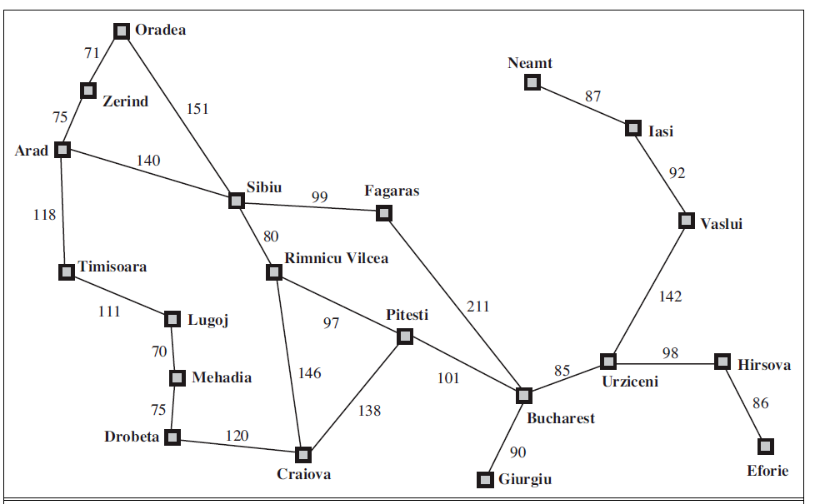

* **Goal Formulation:** El agente adopta el objetivo de alcanzar Bucharest. Un objetivo limita el comopotamiento y por tanto las acciones a ser consideradas
* **Problem formulation:** El agente desarrolla una descripción (Abstracta) de los estados y acciones necesarias para alcanzar su objetivo. Para este agente particular un buen modelo es considerar las acciones de viajar de una ciudad a una ciudad adyacente por lo que el único cambio en cada estado será la ciudad.
* **Search:** Antes de realizar acciones en el munndo real, el agente simula sequencias de acciones en su modelo abstracto, busca hasta encontrar una secuencia de acciones que logra su objetivo. Esa secuencia es llamada una *solución* . El agente puede simular multiples veces sin lograr una solución, encontrar varias o darse cuenta que no existe ninguna.
* **Execution:** El modelo puede ejecutar las acciones en la solución, una a la vez.



### Relación con un Sistema de Lazo Abierto (*Open-Loop System*):
En la teoría de control, un sistema de lazo abierto (*open-loop system*) es aquel en el que las acciones del agente no dependen de retroalimentación del entorno una vez que se ha iniciado el proceso. En este caso, el agente formula un plan basado en un modelo abstracto y ejecuta las acciones de manera secuencial sin adaptarse a cambios en el entorno durante la ejecución.

Este enfoque refleja un sistema de control de lazo abierto, ya que, una vez que el agente comienza a ejecutar las acciones derivadas de la solución, no se ajusta en función de la retroalimentación del mundo real. Suponemos que el entorno es completamente observable, determinista y conocido, lo que permite que este enfoque funcione eficientemente. Sin embargo, en escenarios donde el entorno es incierto o cambia dinámicamente, un sistema de lazo cerrado sería más adecuado, ya que permitiría al agente ajustar su comportamiento según la retroalimentación recibida.

Este framework asume un entorno completamente observable, determinista y conocido, en el que la solución a cualquier problema es simplemente una secuencia de acciones.

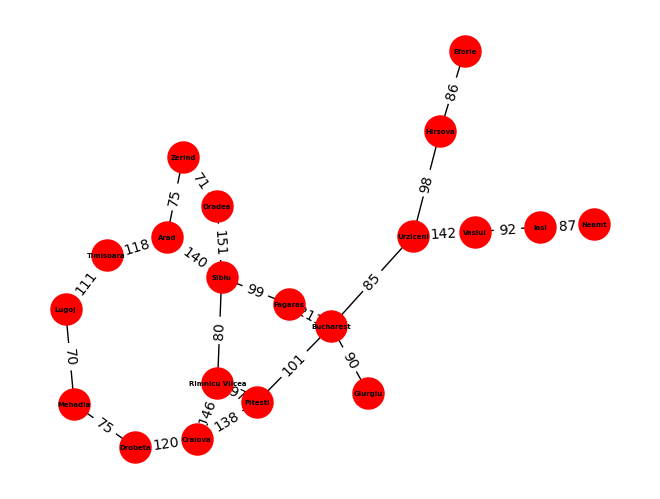

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo no dirigido
G = nx.Graph()

# Agregar las aristas con los pesos (distancias)
edges = [
    ("Oradea", "Zerind", 71),
    ("Oradea", "Sibiu", 151),
    ("Zerind", "Arad", 75),
    ("Arad", "Sibiu", 140),
    ("Arad", "Timisoara", 118),
    ("Timisoara", "Lugoj", 111),
    ("Lugoj", "Mehadia", 70),
    ("Mehadia", "Drobeta", 75),
    ("Drobeta", "Craiova", 120),
    ("Craiova", "Rimnicu Vilcea", 146),
    ("Craiova", "Pitesti", 138),
    ("Rimnicu Vilcea", "Sibiu", 80),
    ("Rimnicu Vilcea", "Pitesti", 97),
    ("Sibiu", "Fagaras", 99),
    ("Fagaras", "Bucharest", 211),
    ("Pitesti", "Bucharest", 101),
    ("Bucharest", "Giurgiu", 90),
    ("Bucharest", "Urziceni", 85),
    ("Urziceni", "Hirsova", 98),
    ("Hirsova", "Eforie", 86),
    ("Urziceni", "Vaslui", 142),
    ("Vaslui", "Iasi", 92),
    ("Iasi", "Neamt", 87)
]

# Añadir las aristas al grafo
G.add_weighted_edges_from(edges)

# Dibujar el grafo
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='red', node_size=500, font_size=5, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()


# Resolución de Problemas Mediante Búsqueda en Inteligencia Artificial

En el ámbito de la **Inteligencia Artificial (IA)**, la búsqueda juega un papel crucial en la resolución de problemas. Un problema de búsqueda consiste en encontrar una secuencia de acciones que nos permita llegar desde un estado inicial hasta un estado objetivo deseado. Este enfoque puede aplicarse a diversos escenarios, desde la búsqueda de rutas en mapas hasta la toma de decisiones estratégicas en juegos. En este texto, exploraremos los componentes clave de los problemas de búsqueda, los diferentes tipos de algoritmos utilizados para resolverlos y ejemplos de problemas comunes.

## Definición de un Problema de Búsqueda

Un problema de búsqueda puede definirse formalmente con los siguientes elementos:

1. **Estado Inicial**: El punto de partida, que representa la situación o condición en la que comienza el problema.
2. **Espacio de Estados**: El conjunto de todos los estados posibles que se pueden alcanzar a partir del estado inicial.
3. **Acciones**: Las operaciones o movimientos que permiten pasar de un estado a otro.
4. **Función de Transición**: Una función que toma un estado y una acción, y devuelve un nuevo estado.
5. **Estado Objetivo**: El estado final o meta que queremos alcanzar.
6. **Criterio de Costo**: Un valor numérico que mide el costo de llegar a un estado desde el estado inicial.


###  **Búsqueda Local**

En algunos problemas, en lugar de explorar todo el espacio de estados, los algoritmos de búsqueda local intentan mejorar continuamente el estado actual hasta encontrar una solución. Estos algoritmos son útiles en problemas de optimización donde el espacio de búsqueda es grande.

- **Escalada de Colinas**: Intenta mejorar el estado actual moviéndose hacia un estado con mejor valor. Sin embargo, puede quedar atrapada en máximos locales.
  
- **Temple Simulado**: Permite tomar decisiones subóptimas temporalmente para escapar de máximos locales, lo que lo hace más efectivo en ciertos problemas.
  
- **Algoritmos Genéticos**: Imitan el proceso de evolución natural para encontrar soluciones a problemas complejos a través de la selección, mutación y cruce.

#### Ejemplo:
Imagina que estás tratando de optimizar el diseño de una red de transporte, donde debes minimizar el costo total de construcción de carreteras. La escalada de colinas podría mejorar continuamente el diseño actual, pero podría quedarse atrapada en una solución subóptima. El temple simulado o los algoritmos genéticos, al permitir movimientos "hacia atrás", podrían ayudar a encontrar soluciones más globalmente óptimas.

## Aplicaciones Prácticas de la Búsqueda en IA

### 1. **Navegación y Planificación de Rutas**
Los algoritmos de búsqueda son fundamentales en sistemas de navegación como Google Maps o GPS, donde se utiliza la búsqueda A\* para encontrar rutas óptimas entre ubicaciones.

### 2. **Resolución de Juegos**
Los juegos de estrategia, como el ajedrez o Go, se modelan como problemas de búsqueda en los que se utiliza el algoritmo **Minimax** o variantes como **Alfa-Beta** para planificar movimientos ganadores.

### 3. **Planificación Automática en Robótica**
Los robots autónomos deben resolver problemas de búsqueda para planificar caminos, evitar obstáculos y ejecutar tareas de manera eficiente.

### 4. **Optimización en Machine Learning**
En machine learning, la búsqueda local y los algoritmos genéticos pueden usarse para optimizar hiperparámetros y estructuras de redes neuronales.



### Algoritmos de Búsqueda

En los problemas de búsqueda, el objetivo es encontrar una secuencia de acciones que lleve desde un estado inicial a un estado objetivo (meta). Cada algoritmo tiene diferentes estrategias para explorar el espacio de búsqueda. A continuación, te explico tres algoritmos clave: **búsqueda en profundidad**, **búsqueda en anchura** y el **algoritmo de Dijkstra**.

---

### 1. **Búsqueda en Profundidad (Depth-First Search, DFS)**

#### Explicación:
La búsqueda en profundidad (DFS) explora tan profundamente como sea posible a lo largo de una rama antes de retroceder y explorar otras alternativas. Utiliza una estructura de **pila** (o recursión) para recordar qué nodos visitar a continuación.

- **Estrategia**: Explorar una rama hasta llegar al fondo (ya sea encontrando una solución o alcanzando un nodo sin más opciones) y luego retroceder para explorar otras ramas.
- **Ventajas**: DFS es eficiente en términos de memoria, ya que solo necesita recordar los nodos en la ruta actual.
- **Desventajas**: No garantiza encontrar la solución óptima, y puede quedar atrapada en ciclos si el espacio de búsqueda no es finito o no se detectan los ciclos.

#### Ejemplo:
Imagina que quieres encontrar un camino en un laberinto. DFS elegiría un camino y lo seguiría hasta el final, retrocediendo solo si se topa con un callejón sin salida.

```python
# Ejemplo simple de DFS en un grafo representado como un diccionario
grafo = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

def dfs(grafo, nodo, visitado=None):
    if visitado is None:
        visitado = set()
    visitado.add(nodo)
    print(nodo)
    for vecino in grafo[nodo]:
        if vecino not in visitado:
            dfs(grafo, vecino, visitado)

# DFS empezando en 'A'
dfs(grafo, 'A')
```

---

### 2. **Búsqueda en Anchura (Breadth-First Search, BFS)**

#### Explicación:
La búsqueda en anchura (BFS) explora todos los nodos a una profundidad dada antes de pasar a la siguiente profundidad. Utiliza una **cola** para almacenar los nodos que están siendo explorados.

- **Estrategia**: Explora todos los nodos en el nivel actual antes de descender al siguiente nivel.
- **Ventajas**: BFS garantiza encontrar la solución más corta (en términos de cantidad de pasos) si la solución existe.
- **Desventajas**: Puede consumir mucha memoria, ya que tiene que almacenar todos los nodos de cada nivel.

#### Ejemplo:
En un laberinto, BFS revisaría todas las posibles direcciones desde el punto inicial antes de adentrarse más profundamente en cualquier dirección.

```python
# Ejemplo simple de BFS en un grafo representado como un diccionario
from collections import deque

grafo = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}

def bfs(grafo, nodo_inicial):
    visitado = set()
    cola = deque([nodo_inicial])
    
    while cola:
        nodo = cola.popleft()
        if nodo not in visitado:
            print(nodo)
            visitado.add(nodo)
            cola.extend(grafo[nodo])

# BFS empezando en 'A'
bfs(grafo, 'A')
```

---

### 3. **Algoritmo de Dijkstra**

#### Explicación:
El algoritmo de Dijkstra encuentra el camino más corto desde un nodo inicial a todos los demás nodos en un grafo ponderado (donde las aristas tienen pesos). Utiliza una cola de prioridad (heap) para explorar los caminos con menor costo acumulado.

- **Estrategia**: Elige el nodo con el camino más corto conocido, y luego actualiza las distancias de sus vecinos. Repite este proceso hasta que todos los nodos hayan sido procesados.
- **Ventajas**: Encuentra el camino más corto en grafos con pesos no negativos.
- **Desventajas**: Puede ser ineficiente en grafos densos. No funciona con aristas de peso negativo.

#### Ejemplo:
En un mapa de carreteras, Dijkstra te ayudaría a encontrar la ruta más corta desde una ciudad a todas las demás, teniendo en cuenta las distancias entre ciudades.

```python
import heapq

# Grafo ponderado representado como un diccionario
grafo = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

def dijkstra(grafo, inicio):
    distancias = {nodo: float('inf') for nodo in grafo}
    distancias[inicio] = 0
    cola_prioridad = [(0, inicio)]
    
    while cola_prioridad:
        distancia_actual, nodo_actual = heapq.heappop(cola_prioridad)
        
        if distancia_actual > distancias[nodo_actual]:
            continue
        
        for vecino, peso in grafo[nodo_actual].items():
            distancia = distancia_actual + peso
            
            if distancia < distancias[vecino]:
                distancias[vecino] = distancia
                heapq.heappush(cola_prioridad, (distancia, vecino))
    
    return distancias

# Dijkstra empezando en 'A'
distancias_desde_A = dijkstra(grafo, 'A')
print(distancias_desde_A)
```

---

### Resumen de Diferencias:

- **DFS**: Explora un camino completamente antes de retroceder. No garantiza la solución óptima.
- **BFS**: Explora todos los caminos de igual longitud antes de profundizar. Garantiza la solución más corta.
- **Dijkstra**: Encuentra el camino más corto en un grafo ponderado, priorizando caminos de menor costo.

---

### Ejemplos:

1. **Búsqueda en Profundidad (DFS):**
   - Grafo: A -> B -> C
   - Resultado: DFS explora primero A, luego B, y finalmente C, siguiendo un camino hasta el final antes de retroceder.

2. **Búsqueda en Anchura (BFS):**
   - Grafo: A -> B, A -> C
   - Resultado: BFS explora primero A, luego sus vecinos (B y C), sin profundizar en ninguna rama antes de que todos los nodos del nivel actual hayan sido visitados.

3. **Dijkstra:**
   - Grafo con distancias (A -> B (1), A -> C (4), B -> C (2))
   - Resultado: Dijkstra encontraría que el camino más corto de A a C es a través de B (A -> B -> C) con un costo total de 3.

# Ejercicios propuestos

1. Construya un algoritmo de busqueda para ajustar hiperparametros en un modelo de machine learning o deep learning.
2. Construya un algoritmo de busqueda para solucionar el problema TSP para el siguiente grafo

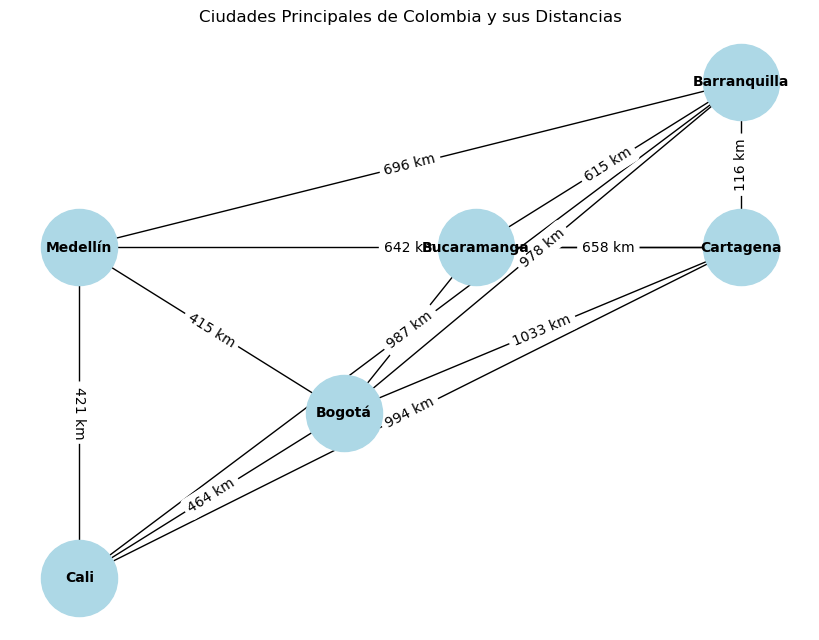

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear un grafo vacío
G = nx.Graph()

# Lista de ciudades y distancias entre ellas (en kilómetros)
cities_distances = [
    ('Bogotá', 'Medellín', 415),
    ('Bogotá', 'Cali', 464),
    ('Bogotá', 'Cartagena', 1033),
    ('Bogotá', 'Barranquilla', 978),
    ('Bogotá', 'Bucaramanga', 398),
    ('Medellín', 'Cali', 421),
    ('Medellín', 'Cartagena', 642),
    ('Medellín', 'Barranquilla', 696),
    ('Cali', 'Cartagena', 994),
    ('Cali', 'Barranquilla', 987),
    ('Cartagena', 'Barranquilla', 116),
    ('Bucaramanga', 'Cartagena', 658),
    ('Bucaramanga', 'Barranquilla', 615)
]

# Añadir las ciudades y distancias al grafo
for city1, city2, distance in cities_distances:
    G.add_edge(city1, city2, weight=distance)

# Posiciones de las ciudades en el gráfico
positions = {
    'Bogotá': (0, 0),
    'Medellín': (-2, 1),
    'Cali': (-2, -1),
    'Cartagena': (3, 1),
    'Barranquilla': (3, 2),
    'Bucaramanga': (1, 1)
}

# Dibujar el grafo
plt.figure(figsize=(8, 6))
nx.draw(G, pos=positions, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold')
nx.draw_networkx_edge_labels(G, pos=positions, edge_labels={(city1, city2): f'{distance} km' for city1, city2, distance in cities_distances})

# Mostrar el grafo
plt.title("Ciudades Principales de Colombia y sus Distancias")
plt.show()
